# Chapter 7: Input/Output Operations
Python for Finance

Storing Python objects on disk - serializing as a stream of bits. "Pickle" is one option to save objects.

In [1]:
import numpy as np
from random import gauss

In [2]:
a = [gauss(1.5,2) for i  in range(1000000)] #generation of normally distributed randoms

Now - writing this object to disk for later retrieval:

In [3]:
import pickle

In [24]:
path = './data/'
pkl_file = open(path + 'data.pkl','wb') #open file for writing; existing files will be overwritten
# needs to be "wb" for 'binary' mode

In [25]:
%time pickle.dump(a, pkl_file)

Wall time: 61.2 ms


In [26]:
pkl_file

<_io.BufferedWriter name='./data/data.pkl'>

In [27]:
pkl_file.close()

In [31]:
pkl_file = open(path + 'data.pkl','rb')
%time b = pickle.load(pkl_file)

Wall time: 104 ms


In [32]:
b[:5]

[0.23723380795718563,
 0.6607802312042388,
 4.025078887610688,
 0.23984316223185065,
 0.838471745395173]

In [33]:
a[:5]

[0.23723380795718563,
 0.6607802312042388,
 4.025078887610688,
 0.23984316223185065,
 0.838471745395173]

Comparing the two objects using NumPy "allclose"

In [34]:
np.allclose(np.array(a),np.array(b))

True

In [35]:
np.sum(np.array(a)-np.array(b))

0.0

Storing more than one object:

In [37]:
pkl_file = open(path + 'data.pkl','wb')
%time pickle.dump(np.array(a), pkl_file)

Wall time: 74.2 ms


In [38]:
%time pickle.dump(np.array(a)**2, pkl_file)

Wall time: 52.6 ms


In [39]:
pkl_file.close() 

Now we have two objects stored in the pickle file. The file size has about doubled. The time was much shorter because of using Numpy arrays instead of lists.

Now we'll read it back in:

In [41]:
pkl_file = open(path + 'data.pkl','rb')
%time x = pickle.load(pkl_file)

Wall time: 15.5 ms


In [42]:
x

array([ 0.23723381,  0.66078023,  4.02507889, ..., -0.40732438,
        1.4893598 ,  3.08356318])

Calling pickle.load again loads the second object. Pickle follows "FIFO: first in, first out" logic. 

In [43]:
y = pickle.load(pkl_file)
y

array([  0.05627988,   0.43663051,  16.20126005, ...,   0.16591315,
         2.21819261,   9.50836188])

In [44]:
pkl_file.close()

A good work around the lack of meta data in pickle objects is to store a dict instead of the individual objects. The dict contains all the objects that you want to store. Then each has a name and the associated object with it.

In [45]:
pkl_file = open(path + 'data.pkl','wb')
pickle.dump({'x':x, 'y':y}, pkl_file)
pkl_file.close()

In [47]:
pkl_file = open(path + 'data.pkl','rb')
data = pickle.load(pkl_file)
pkl_file.close()

for key in data.keys():
    print(key, data[key][:4])

x [ 0.23723381  0.66078023  4.02507889  0.23984316]
y [  0.05627988   0.43663051  16.20126005   0.05752474]


## Reading and Writing Text Files

In [57]:
import pandas as pd

In [63]:
rows = 5000
a = np.random.standard_normal((rows,5)) # dummy data
t = pd.date_range(start='2016/1/1', periods = rows, freq ='H') # a set of hourly date-time objects

In [64]:
t

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-07-26 22:00:00', '2016-07-26 23:00:00',
               '2016-07-27 00:00:00', '2016-07-27 01:00:00',
               '2016-07-27 02:00:00', '2016-07-27 03:00:00',
               '2016-07-27 04:00:00', '2016-07-27 05:00:00',
               '2016-07-27 06:00:00', '2016-07-27 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [60]:
csv_file = open(path + 'data.csv','w') #open file for writing
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [74]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1,no2,no3,no4,no5)
    csv_file.write(s)
csv_file.close()

Reading the data back in:

In [82]:
csv_file = open(path + 'data.csv','r') # open file for reading

In [83]:
for i in range(5):
    print(csv_file.readline())

date,no1,no2,no3,no4,no5

2016-01-01 00:00:00,-1.966891,-0.015180,-1.272752,-0.729383,-1.486552

2016-01-01 01:00:00,1.887909,0.009426,-0.435812,-0.947191,0.372296

2016-01-01 02:00:00,-0.550412,-1.147638,-0.801745,-0.397636,-0.424402

2016-01-01 03:00:00,-1.636977,-0.272307,-0.477479,1.801682,-0.501359



In [84]:
csv_file = open(path + 'data.csv','r') # open file for reading
content = csv_file.readlines()
for line in content[:5]:
    print(line)

date,no1,no2,no3,no4,no5

2016-01-01 00:00:00,-1.966891,-0.015180,-1.272752,-0.729383,-1.486552

2016-01-01 01:00:00,1.887909,0.009426,-0.435812,-0.947191,0.372296

2016-01-01 02:00:00,-0.550412,-1.147638,-0.801745,-0.397636,-0.424402

2016-01-01 03:00:00,-1.636977,-0.272307,-0.477479,1.801682,-0.501359



In [85]:
csv_file.close()

## SQL Databases

In [86]:
import sqlite3 as sq3

In [25]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
con = sq3.connect(path + 'numbs.db')
con.execute(query)

In [26]:
con.commit()

In [27]:
import datetime as dt

In [28]:
data = np.random.standard_normal((10000, 2)).round(5)

for row in data:
    con.execute('INSERT INTO numbs VALUES(?,?,?)', (dt.datetime.now(), row[0],row[1]))
    
con.commit()

Getting data back out again:

In [29]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2016-09-05 15:13:48.876236', -0.6342, -0.21776),
 ('2016-09-05 15:13:48.883756', 0.30521, -0.26153),
 ('2016-09-05 15:13:48.883756', -0.29225, -0.08637),
 ('2016-09-05 15:13:48.883756', 0.59125, 0.42067),
 ('2016-09-05 15:13:48.883756', 2.54211, 0.17047),
 ('2016-09-05 15:13:48.883756', 0.83021, 1.13861),
 ('2016-09-05 15:13:48.883756', 0.89809, -0.67188),
 ('2016-09-05 15:13:48.883756', -0.53726, 0.42455),
 ('2016-09-05 15:13:48.883756', 1.03697, -0.52841),
 ('2016-09-05 15:13:48.883756', -0.14061, 0.36608)]

One row at a time:

In [30]:
pointer = con.execute('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())

('2016-09-05 15:13:48.876236', -0.6342, -0.21776)
('2016-09-05 15:13:48.883756', 0.30521, -0.26153)
('2016-09-05 15:13:48.883756', -0.29225, -0.08637)


In [31]:
con.close()

### Reading and Writing NumPy Arrays

In [32]:
import numpy as np
import sqlite3 as sq3

In [33]:
dtimes = np.arange('2015-01-01 10:00:00','2021-12-31 22:00:00',dtype='datetime64[m]') #minute intervals
len(dtimes)

3681360

In [34]:
dty = np.dtype([('Date','datetime64[m]'), ('No1','f'),('No2','f')])
data = np.zeros(len(dtimes),dtype=dty)

In [35]:
data['Date'] = dtimes

In [19]:
a = np.random.standard_normal((len(dtimes),2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

Saving an ndarray - fast and efficient- watch how fast 57MB is written to SSD.

In [20]:
path = './data/'
%time np.save(path + 'array', data) # suffix .npy is added

Wall time: 1.26 s


Reading the data back in:

In [21]:
%time np.load(path + 'array.npy')

Wall time: 41.6 ms


array([ (datetime.datetime(2015, 1, 1, 15, 0), 0.06473000347614288, -1.4327199459075928),
       (datetime.datetime(2015, 1, 1, 15, 1), 0.042569998651742935, -1.2652699947357178),
       (datetime.datetime(2015, 1, 1, 15, 2), -0.23744000494480133, 0.1102600023150444),
       ...,
       (datetime.datetime(2022, 1, 1, 2, 57), -0.6763299703598022, -2.455749988555908),
       (datetime.datetime(2022, 1, 1, 2, 58), 0.3274100124835968, -0.5900800228118896),
       (datetime.datetime(2022, 1, 1, 2, 59), 0.09442999958992004, 2.1506900787353516)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

## I/O with Pandas

### Reading SQL Results into an NP Array

In [37]:
path

'./data/'

In [38]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)' 
con = sq3.Connection(path + 'numbs.db') 
con.execute( query)

In [39]:
%%time
data = np.random.standard_normal((1000000, 5)).round( 5)
con.executemany('INSERT INTO numbers VALUES (?,?,?,?,?)',data)
con.commit()

Wall time: 13.6 s


In [47]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 and No2 <0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 1.08 s


(-4.5, 0.5)

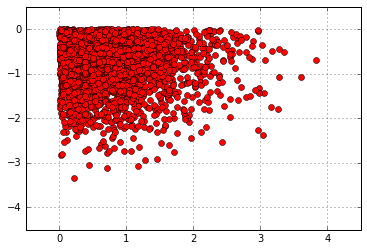

In [48]:
res = res[::100] # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:,1], 'ro')
plt.grid(True)
plt.xlim(-0.5,4.5)
plt.ylim(-4.5,0.5)

In [49]:
import pandas.io.sql as pds

In [51]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 2.84 s


In [52]:
data.head()

,No1,No2,No3,No4,No5
0,-0.28607,0.28159,0.10456,-1.63164,1.12097
1,0.39246,0.81969,0.55469,-0.26018,-1.06914
2,1.16789,0.68825,-0.80251,-0.85082,0.23061
3,-1.08957,0.25383,1.51484,0.16181,1.33515
4,0.77286,-1.21874,-1.09556,0.15082,1.55964


In [53]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()


Wall time: 38.1 ms


,No1,No2,No3,No4,No5
4,0.77286,-1.21874,-1.09556,0.15082,1.55964
8,1.97697,-0.61149,-0.53957,1.31345,1.30016
10,0.11524,-0.67702,0.46461,-0.37247,0.24973
14,0.62916,-1.13495,0.32618,-1.27791,0.79700
18,0.00649,-2.59038,1.77459,0.82153,0.07467


In [54]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5)) & ((data['No2'] < -1) | (data['No2'] > 1))]


Wall time: 38.6 ms


(-4.6744700000000003,
 4.7701900000000004,
 -4.5375199999999998,
 4.7375299999999996)

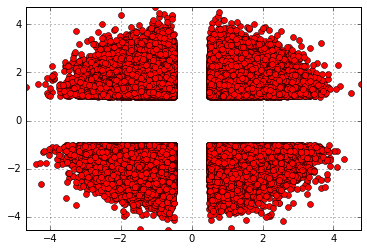

In [55]:
plt.plot(res.No1, res.No2,'ro')
plt.grid(True)
plt.axis('tight')

## H5S for storing whole dataframes

In [58]:
filename = path + 'numbs'
h5s = pd.HDFStore(filename + '.h5s','w')

In [59]:
%time h5s['data'] = data

Wall time: 567 ms


In [60]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./data/numbs.h5s
/data            frame        (shape->[1000000,5])

In [61]:
h5s.close()

In [62]:
%%time 
h5s = pd.HDFStore(filename + '.h5s','r')
temp = h5s['data']
h5s.close()

Wall time: 45.6 ms


In [63]:
np.allclose(np.array(temp), np.array(data))

True

In [64]:
temp = 0.0

## CSV Files

In [65]:
%time data.to_csv(filename + '.csv')

Wall time: 10.9 s


Wall time: 1.44 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002430BE840B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002430BF5D0F0>]], dtype=object)

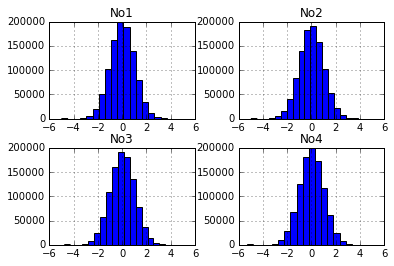

In [66]:
%%time
pd.read_csv(filename + '.csv')[['No1','No2','No3','No4']].hist(bins=20)

In [67]:
%time data[:100000].to_excel(filename + '.xlsx')

Wall time: 16 s


Wall time: 11.4 s


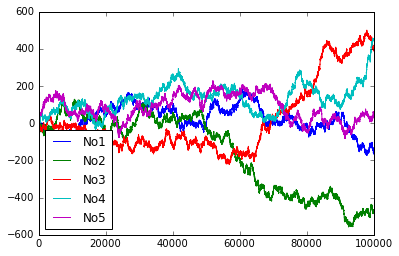

In [68]:
%time pd.read_excel(filename + '.xlsx','Sheet1').cumsum().plot()

## PyTables
Python binding to HDF5 database files.

In [1]:
import numpy as np
import tables as tb 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = './data/'
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')

In [4]:
rows = 2000000
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
  }

In [5]:
filters = tb.Filters(complevel=0) #no compression
tab = h5.create_table('/','ints_floats', 
                      row_des, 
                      title = 'Integers and Floats', 
                      expectedrows=rows, filters=filters)

In [6]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [7]:
pointer = tab.row

Generate the data

In [8]:
ran_int = np.random.randint(0,10000, size = (rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5)

In [9]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append() #appends the data and moves forward one row

tab.flush() # this commits the changes - like "commit" on a database

Wall time: 9.71 s


In [10]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

Creating the same data using NP structured arrays (more "pythonic")

In [11]:
dty = np.dtype([('Date','S26'), ('No1','<i4'),('No2','<i4'),('No3','<f8'),('No4','<f8')])
sarray = np.zeros(len(ran_int), dtype =dty)
sarray

array([(b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0),
       ..., (b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0),
       (b'', 0, 0, 0.0, 0.0)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [12]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] =ran_flo[:,1]

Wall time: 86.7 ms


In [13]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,title = 'Integers and Floats',expectedrows=rows,filters=filters)

Wall time: 76.2 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [14]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [15]:
# removing the duplicate table:
h5.remove_node('/', 'ints_floats_from_array')

In [16]:
tab[:3]

array([(b'2016-09-16 16:45:27.828919', 2853, 8292, -0.23704, -0.15285),
       (b'2016-09-16 16:45:27.830423', 7347, 8434, -1.56559, 0.4472),
       (b'2016-09-16 16:45:27.830423', 7196, 5865, -0.34156, -1.77194)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [17]:
tab[:4]['No4']

array([-0.15285,  0.4472 , -1.77194, -0.25078])

In [18]:
%time np.sum(tab[:]['No3'])

Wall time: 103 ms


-1304.7103100000004

In [19]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 121 ms


133322481.2829394

2000000
Wall time: 506 ms


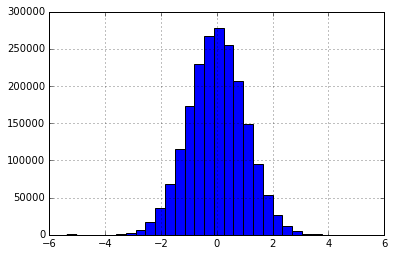

In [20]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))

In [21]:
%%time 
res = np.array([(row['No3'], row['No4']) for row in tab.where('((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))')])[:: 100]


Wall time: 467 ms


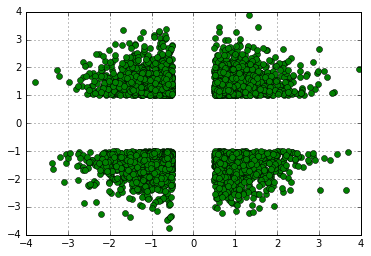

In [22]:
plt.plot(res.T[0],res.T[1],'go')
plt.grid(True)

In [23]:
%%time 
values = tab.cols.No3[:] 
print("Max {:18.3f}".format(values.max())) 
print("Ave {:18.3f}".format(values.mean())) 
print("Min {:18.3f}".format(values.min()))
print("Std {:18.3f}".format(values.std()))

Max              5.158
Ave             -0.001
Min             -5.369
Std              1.000
Wall time: 114 ms


In [24]:
%%time 
results = [(row['No1'], row['No2']) for row in tab.where('((No1 > 9800) | (No1 < 200)) & ((No2 > 4500) & (No2 < 5500))')] 
for res in results[: 4]: 
    print(res)

(9977, 5328)
(9918, 4910)
(2, 4584)
(113, 5245)
Wall time: 123 ms


## Compressed Tables

In [27]:
path = './data/'
filename = 'tab.h5c'
h5c = tb.open_file(filename,'w')

In [28]:
filters = tb.Filters(complevel=4, complib='blosc')
tabc = h5c.create_table('/','ints_floats', sarray,title='Integers and Floats',expectedrows=rows, filters=filters)

In [29]:
%%time
res = np.array([(row['No3'], row['No4']) for row in tabc.where('((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 533 ms


In [30]:
# reading the data into an ndarray
%time arr_non = tab.read()

Wall time: 77.2 ms


In [31]:
%time arr_com = tabc.read()

Wall time: 179 ms


Read time is much slower, but disk space is also about 20% of the uncompressed table. Sometimes this tradeoff is worth it.

In [35]:
h5c.close()

## PyTables and ndarrays
These are also very fast!

In [36]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

Wall time: 722 ms


In [37]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [38]:
h5.close()

## Out of memory computations

In [27]:
filename = path + 'array1.h5'
h5 = tb.open_file(filename,'w')

In [28]:
n = 1000
ear = h5.create_earray(h5.root, 'ear', atom=tb.Float64Atom(),shape=(0,n))

In [29]:
%%time
rand = np.random.standard_normal((n,n))
for i in range(100):
    ear.append(rand)
ear.flush()

Wall time: 25.5 s


In [30]:
ear

/ear (EArray(100000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [31]:
ear.size_on_disk

800000000

In [33]:
out = h5.create_earray(h5.root,'out',atom = tb.Float64Atom(), shape =(0, n))

PyTables has a special module to cope with numerical expressions efficiently. It is called Expr and is based on the numerical expression library numexpr. This is what we want to use to calculate the mathematical expression in Equation 7-1 on the whole EArray object that we generated before.

$$ y = 3\sin(x) + \sqrt{|x|} $$ 

In [35]:
expr = tb.Expr('3*sin(ear) + sqrt(abs(ear))')
# the numerical expression as a string object

expr.set_output(out, append_mode=True)
# target to store results is disk-based array

In [36]:
%time expr.eval()

Wall time: 49.8 s


/out (EArray(100000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [37]:
out[0,:10]

array([ 4.2064763 ,  4.01687277,  2.67248385, -1.48604625,  1.40079629,
       -1.57811622,  0.00675748,  0.93798658,  1.61720683,  2.59793832])

In [39]:
%time imarray = ear.read()
# read whole array into memory

Wall time: 790 ms


In [40]:
import numexpr as  ne
expr = '3*sin(imarray) + sqrt(abs(imarray))'

In [41]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0,:10]

Wall time: 471 ms


array([ 4.2064763 ,  4.01687277,  2.67248385, -1.48604625,  1.40079629,
       -1.57811622,  0.00675748,  0.93798658,  1.61720683,  2.59793832])

In [42]:
h5.close()